# Token Distribution analysis in NLP datasets

The idea here is to analyse how token are distributed across NLP datasets and across sentences within these datasets. Here is a usefull ressource on how tokens are computed using BERT : https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/.

## Environment settings

In [ ]:
!pip install transformers
!pip install -U datasets fsspec huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.3/509.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.31.2
    Uninstalling huggingface-hub-0.31.2:
      Successfully uninstalled huggingface-hub-0.31.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [ ]:
!pip install -U datasets fsspec huggingface_hub

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
})

In [ ]:
from datasets import load_dataset
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

In [ ]:
#Import models and tokenizers
from transformers import BertTokenizer, BertModel, GPT2Tokenizer, GPT2Model, RobertaModel, RobertaTokenizer

#Load BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased',
                                       output_hidden_states=True)

#Load GPT-2
gpt_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt_model = GPT2Model.from_pretrained('gpt2',
                                      output_hidden_states=True)

#Load RoBERTa
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
roberta_model = RobertaModel.from_pretrained('roberta-base',
                                             output_hidden_states=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Tokenization of 10k sentences from the BookCorpus dataset, including RoBERTa
corpus_size = 10000
corpus_text = dataset['train']['text']

token_id_container = {
    'bert': [],
    'gpt': [],
    'roberta': []
}

for idx in range(corpus_size):
    token_sequ = corpus_text[idx]

    #BERT tokenization
    bert_token_list = bert_tokenizer(token_sequ, return_tensors="pt")['input_ids'][0].tolist()
    token_id_container['bert'].extend(bert_token_list)

    #GPT-2 tokenization
    gpt_token_list = gpt_tokenizer(token_sequ, return_tensors="pt")['input_ids'][0].tolist()
    token_id_container['gpt'].extend(gpt_token_list)

    #RoBERTa tokenization
    roberta_token_list = roberta_tokenizer(token_sequ, return_tensors="pt")['input_ids'][0].tolist()
    token_id_container['roberta'].extend(roberta_token_list)

Token indices sequence length is longer than the specified maximum sequence length for this model (647 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors


## BERT

### tokenizer distribution

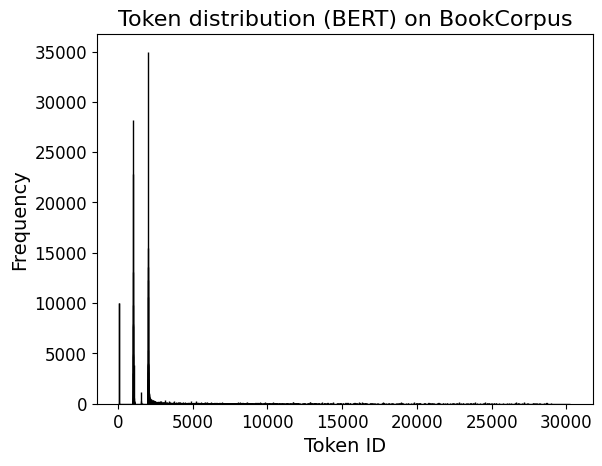

In [ ]:
plt.hist(token_id_container['bert'], bins=30522, color='blue', edgecolor='black')

plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.title('Token distribution (BERT) on BookCorpus')

plt.show()

In [ ]:
#token IDs 101 and 102 come very frequently in the dataset (obvious)
  #CLS appears at the start of each sentence
  #SEP is used to distinguish between different sentences
list(bert_tokenizer.vocab.keys())[100:110]

['[UNK]',
 '[CLS]',
 '[SEP]',
 '[MASK]',
 '[unused99]',
 '[unused100]',
 '[unused101]',
 '[unused102]',
 '[unused103]',
 '[unused104]']

In [ ]:
#token IDs between 1000 and 1100 (roughly) have a high frequency
#this is because they are very characters like punctuation etc..
list(bert_tokenizer.vocab.keys())[1000:1200]

['"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '¦',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '®',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 '×',
 'ß',
 'æ',
 'ð',
 '÷',
 'ø',
 'þ',
 'đ',
 'ħ',
 'ı',
 'ł',
 'ŋ',
 'œ',
 'ƒ',
 'ɐ',
 'ɑ',
 'ɒ',
 'ɔ',
 'ɕ',
 'ə',
 'ɛ',
 'ɡ',
 'ɣ',
 'ɨ',
 'ɪ',
 'ɫ',
 'ɬ',
 'ɯ',
 'ɲ',
 'ɴ',
 'ɹ',
 'ɾ',
 'ʀ',
 'ʁ',
 'ʂ',
 'ʃ',
 'ʉ',
 'ʊ',
 'ʋ',
 'ʌ',
 'ʎ',
 'ʐ',
 'ʑ',
 'ʒ',
 'ʔ',
 'ʰ',
 'ʲ',
 'ʳ',
 'ʷ',
 'ʸ',
 'ʻ',
 'ʼ',
 'ʾ',
 'ʿ',
 'ˈ',
 'ː',
 'ˡ',
 'ˢ',
 'ˣ',
 'ˤ',
 'α',
 'β',
 'γ',
 'δ',
 'ε',
 'ζ',
 'η',
 'θ',
 'ι',
 'κ',
 'λ',
 'μ

In [ ]:
#vocabulary tokens between 2000 and 2200 correspond to widely used words (e.g. 'to', 'was', 'he', etc...)
#they have a very high frequency in the book corpus
list(bert_tokenizer.vocab.keys())[2000:2200]

['to',
 'was',
 'he',
 'is',
 'as',
 'for',
 'on',
 'with',
 'that',
 'it',
 'his',
 'by',
 'at',
 'from',
 'her',
 '##s',
 'she',
 'you',
 'had',
 'an',
 'were',
 'but',
 'be',
 'this',
 'are',
 'not',
 'my',
 'they',
 'one',
 'which',
 'or',
 'have',
 'him',
 'me',
 'first',
 'all',
 'also',
 'their',
 'has',
 'up',
 'who',
 'out',
 'been',
 'when',
 'after',
 'there',
 'into',
 'new',
 'two',
 'its',
 '##a',
 'time',
 'would',
 'no',
 'what',
 'about',
 'said',
 'we',
 'over',
 'then',
 'other',
 'so',
 'more',
 '##e',
 'can',
 'if',
 'like',
 'back',
 'them',
 'only',
 'some',
 'could',
 '##i',
 'where',
 'just',
 '##ing',
 'during',
 'before',
 '##n',
 'do',
 '##o',
 'made',
 'school',
 'through',
 'than',
 'now',
 'years',
 'most',
 'world',
 'may',
 'between',
 'down',
 'well',
 'three',
 '##d',
 'year',
 'while',
 'will',
 '##ed',
 '##r',
 '##y',
 'later',
 '##t',
 'city',
 'under',
 'around',
 'did',
 'such',
 'being',
 'used',
 'state',
 'people',
 'part',
 'know',
 'against'

In [ ]:
list(bert_tokenizer.vocab.keys())[15000:15500]

['##lip',
 'cigarettes',
 'subscription',
 'goodness',
 '##ically',
 'browne',
 '##hos',
 '##tech',
 'kyoto',
 'donor',
 '##erty',
 'damaging',
 'friction',
 'drifting',
 'expeditions',
 'hardened',
 'prostitution',
 '152',
 'fauna',
 'blankets',
 'claw',
 'tossing',
 'snarled',
 'butterflies',
 'recruits',
 'investigative',
 'coated',
 'healed',
 '138',
 'communal',
 'hai',
 'xiii',
 'academics',
 'boone',
 'psychologist',
 'restless',
 'lahore',
 'stephens',
 'mba',
 'brendan',
 'foreigners',
 'printer',
 '##pc',
 'ached',
 'explode',
 '27th',
 'deed',
 'scratched',
 'dared',
 '##pole',
 'cardiac',
 '1780',
 'okinawa',
 'proto',
 'commando',
 'compelled',
 'oddly',
 'electrons',
 '##base',
 'replica',
 'thanksgiving',
 '##rist',
 'sheila',
 'deliberate',
 'stafford',
 'tidal',
 'representations',
 'hercules',
 'ou',
 '##path',
 '##iated',
 'kidnapping',
 'lenses',
 '##tling',
 'deficit',
 'samoa',
 'mouths',
 'consuming',
 'computational',
 'maze',
 'granting',
 'smirk',
 'razor',
 '

In [ ]:
#zoom on the distribution of the first 3000 token ID
bert_trunc_token_id_container = []
token_id_limit = 3000
for id in token_id_container['bert'] :
  if id < token_id_limit :
    bert_trunc_token_id_container.append(id)

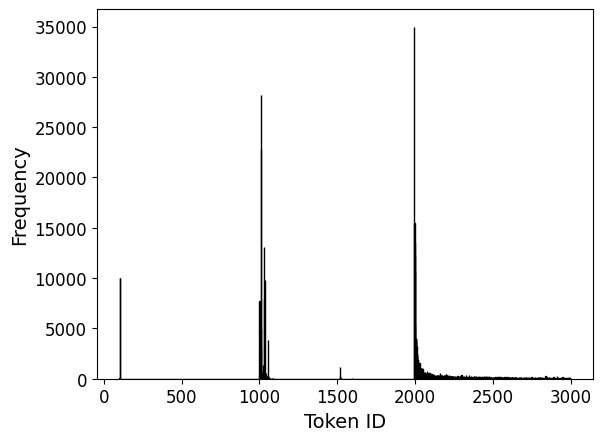

In [ ]:
plt.hist(bert_trunc_token_id_container, bins=token_id_limit, color='blue', edgecolor='black')
plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.show()

### word embedding layer distribution (100 sentences)

[ 0.16855061 -0.28576735 -0.32612568 ... -0.5347268  -0.33719677
 -0.14839235]


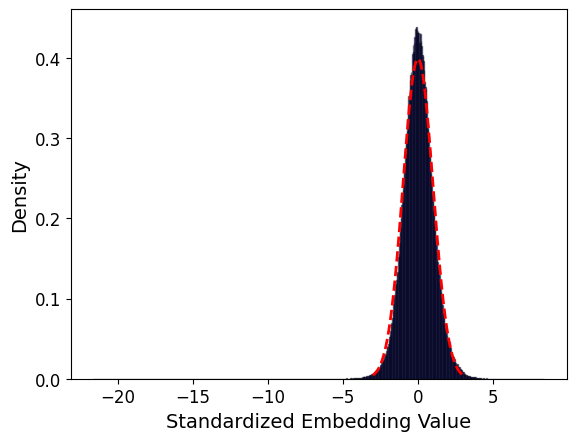

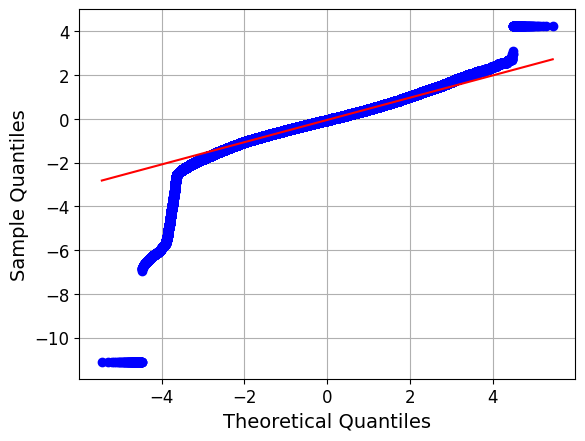

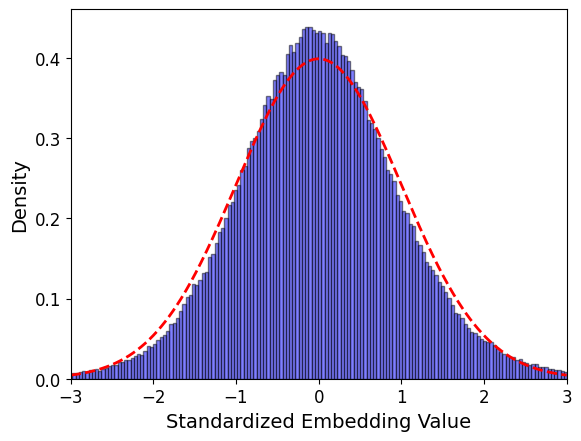

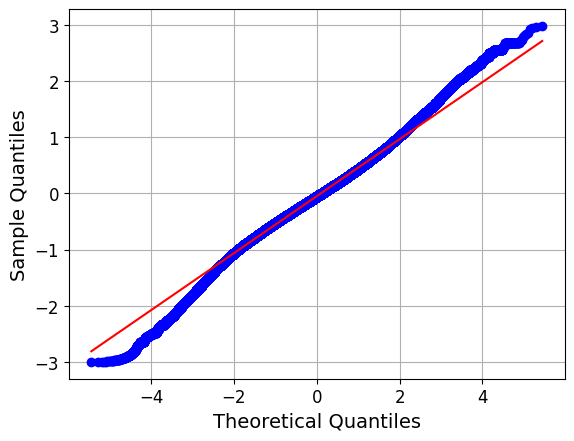

In [ ]:
import scipy.stats as stats
from scipy.stats import norm

#Input formating
batch_size = 100
text = dataset['train']['text']
input = text[:batch_size]
input = bert_tokenizer(input, padding=True, truncation=True, return_tensors="pt")

#Forward pass
with torch.no_grad():
    outputs = bert_model(**input)
hidden_states = outputs.hidden_states #[layer, batch, token, features]

word_embedding_output = hidden_states[0]

#Flatten the data
data = word_embedding_output.reshape(-1).numpy()
print(data)

# Standardize the data
mean = np.mean(data)
std = np.std(data)
data_standardized = (data - mean) / std

# Plot the normalized histogram of standardized data
plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)
x = np.linspace(-3, 3, 500)
pdf = norm.pdf(x, loc=0, scale=1)

plt.plot(x, pdf, 'r--', lw=2)
plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.show()

stats.probplot(data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()

plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)
plt.plot(x, pdf, 'r--', lw=2)
plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.xlim(-3, 3)
plt.show()

filtered_data = data[(data >= -3) & (data <= 3)]
stats.probplot(filtered_data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()

# GPT2

### tokenizer distribution

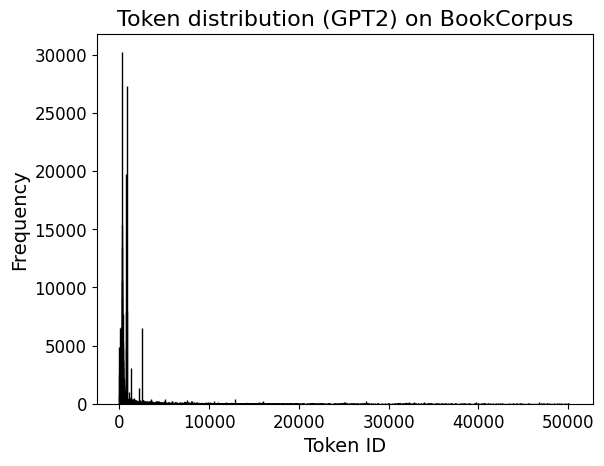

In [ ]:
plt.hist(token_id_container['gpt'], bins=50257, color='blue', edgecolor='black')

plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.title('Token distribution (GPT2) on BookCorpus')

plt.show()

In [ ]:
gpt_trunc_token_id_container = []
token_id_limit = 3000
for id in token_id_container['gpt'] :
  if id < token_id_limit :
    gpt_trunc_token_id_container.append(id)

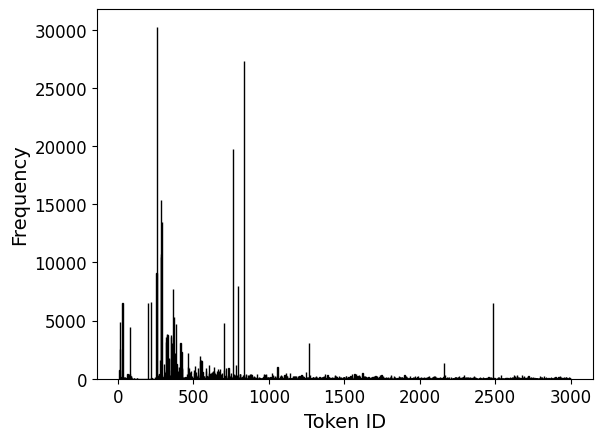

In [ ]:
plt.hist(gpt_trunc_token_id_container, bins=token_id_limit, color='blue', edgecolor='black')

plt.xlabel('Token ID')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#the first IDs correspond to very frequent characters
list(gpt_tokenizer.get_vocab().keys())[0:120]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '¦',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '®',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¸',
 '¹',
 'º',
 '»']

In [ ]:
#the IDs from 250 to 500 correspond to very frequent characters but in different languages
#since it seems like Book Corpus dataset is in English, the frequency of the first words is lower than for the BERT tokenizer
#(whose first words are in English)
list(gpt_tokenizer.get_vocab().keys())[250:500]

['ľ',
 'Ŀ',
 'ŀ',
 'Ł',
 'ł',
 'Ń',
 'Ġt',
 'Ġa',
 'he',
 'in',
 're',
 'on',
 'Ġthe',
 'er',
 'Ġs',
 'at',
 'Ġw',
 'Ġo',
 'en',
 'Ġc',
 'it',
 'is',
 'an',
 'or',
 'es',
 'Ġb',
 'ed',
 'Ġf',
 'ing',
 'Ġp',
 'ou',
 'Ġan',
 'al',
 'ar',
 'Ġto',
 'Ġm',
 'Ġof',
 'Ġin',
 'Ġd',
 'Ġh',
 'Ġand',
 'ic',
 'as',
 'le',
 'Ġth',
 'ion',
 'om',
 'll',
 'ent',
 'Ġn',
 'Ġl',
 'st',
 'Ġre',
 've',
 'Ġe',
 'ro',
 'ly',
 'Ġbe',
 'Ġg',
 'ĠT',
 'ct',
 'ĠS',
 'id',
 'ot',
 'ĠI',
 'ut',
 'et',
 'ĠA',
 'Ġis',
 'Ġon',
 'im',
 'am',
 'ow',
 'ay',
 'ad',
 'se',
 'Ġthat',
 'ĠC',
 'ig',
 'Ġfor',
 'ac',
 'Ġy',
 'ver',
 'ur',
 'Ġu',
 'ld',
 'Ġst',
 'ĠM',
 "'s",
 'Ġhe',
 'Ġit',
 'ation',
 'ith',
 'ir',
 'ce',
 'Ġyou',
 'il',
 'ĠB',
 'Ġwh',
 'ol',
 'ĠP',
 'Ġwith',
 'Ġ1',
 'ter',
 'ch',
 'Ġas',
 'Ġwe',
 'Ġ(',
 'nd',
 'ill',
 'ĠD',
 'if',
 'Ġ2',
 'ag',
 'ers',
 'ke',
 'Ġ"',
 'ĠH',
 'em',
 'Ġcon',
 'ĠW',
 'ĠR',
 'her',
 'Ġwas',
 'Ġr',
 'od',
 'ĠF',
 'ul',
 'ate',
 'Ġat',
 'ri',
 'pp',
 'ore',
 'ĠThe',
 'Ġse',
 'us',
 'Ġ

In [ ]:
#these words are obviously not common in BookCorpus
list(gpt_tokenizer.get_vocab().keys())[30000:30100]

['ĠMineral',
 'token',
 'ĠFD',
 'Rew',
 'Ġell',
 '630',
 'Ġchancellor',
 'ĠGos',
 'Ġamounted',
 'ĠRecre',
 'omez',
 'ĠOptim',
 'ĠOlive',
 'Ġtracker',
 'owler',
 'ĠUnique',
 'Root',
 'Ġmaritime',
 'ĠQuran',
 'ĠAdapt',
 'Ġecosystems',
 'ĠRepeat',
 'ĠSoy',
 'ĠIMP',
 'Ġgraduating',
 'andem',
 'Pur',
 'ĠReset',
 'ĠTrick',
 'ĠPhilly',
 'ĠTue',
 'ĠMalaysian',
 'Ġclimax',
 'Ġbury',
 'Ġconspic',
 'ĠSouthampton',
 'ĠFlowers',
 'Ġescorted',
 'ĠEducational',
 'ĠIRC',
 'Ġbrutally',
 'eating',
 'Ġpillar',
 'ĠSang',
 'ĠJude',
 'arling',
 'ĠAmnesty',
 'Ġreminding',
 'ĠAdministrative',
 'hesda',
 'Ġflashed',
 'ĠPBS',
 'perate',
 'feature',
 'Ġswipe',
 'Ġgraves',
 'oultry',
 '261',
 'breaks',
 'ĠGuer',
 'Ġshrimp',
 'ĠVoting',
 'quist',
 'Ġanalytical',
 'Ġtablespoons',
 'ĠSOU',
 'Ġresearched',
 'Ġdisrupted',
 'Ġjour',
 'Ġreplica',
 'Ġcartoons',
 'bians',
 '})',
 'copy',
 'Got',
 'ouched',
 'PUT',
 'Ġswarm',
 'notations',
 'said',
 'Ġrebuilt',
 'Ġcollaborate',
 'Ġraging',
 'Ġnar',
 'Ġdemographics',
 'ĠDDR

### Word Embedding Distribution (100 sentences)

[ 0.03253129 -0.22510764  0.05396363 ...  0.00766146  0.15941548
  0.12199704]


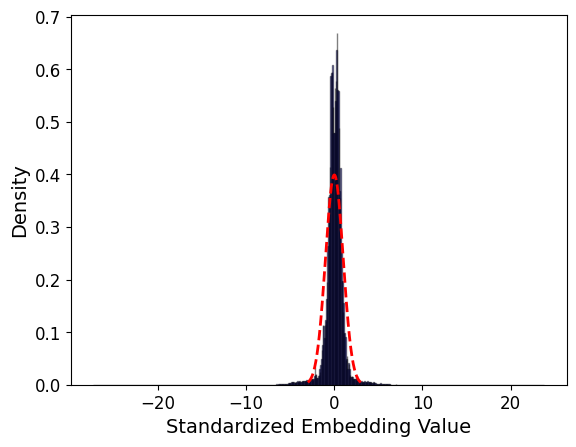

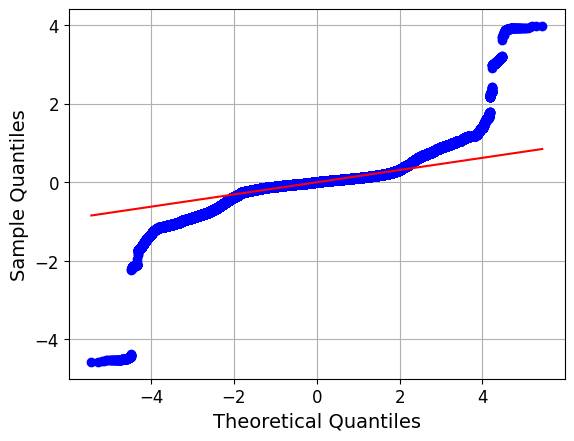

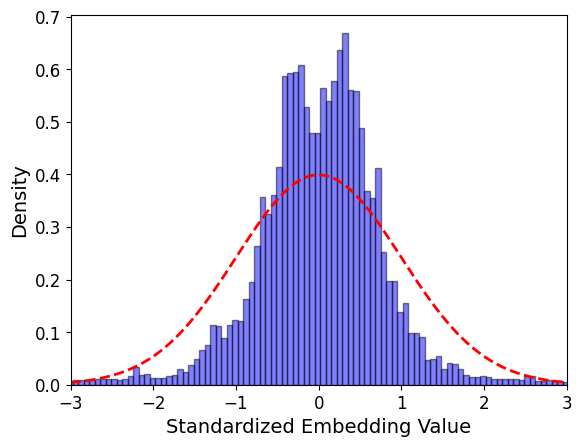

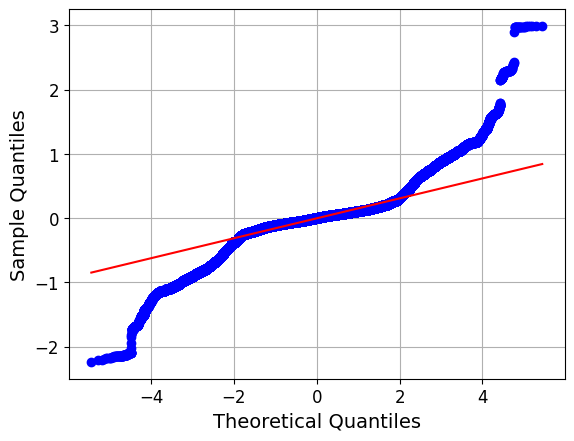

In [ ]:
#Set padding token to eos_token
gpt_tokenizer.pad_token = gpt_tokenizer.eos_token

#input formating
batch_size = 100
text = dataset['train']['text']
input = text[:batch_size]
input = gpt_tokenizer(
    input,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

#Forward pass
with torch.no_grad():
    outputs = gpt_model(**input)
hidden_states = outputs.hidden_states #[layer, batch, token, features]

word_embedding_output = hidden_states[0]

# Flatten the data
data = word_embedding_output.reshape(-1).numpy()
print(data)

#Standardize the data
mean = np.mean(data)
std = np.std(data)
data_standardized = (data - mean) / std

# Plot the normalized histogram of standardized data
plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)
x = np.linspace(-3, 3, 500)
pdf = norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'r--', lw=2)

plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.show()

stats.probplot(data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()

plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)
plt.plot(x, pdf, 'r--', lw=2)
plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.xlim(-3, 3)
plt.show()

filtered_data = data[(data >= -3) & (data <= 3)]
stats.probplot(filtered_data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()

# RoBERTa

In [ ]:
#Zoom on the distribution of the first 3000 token ID
roberta_trunc_token_id_container = []
token_id_limit = 3000
for id in token_id_container['bert'] :
  if id < token_id_limit :
    roberta_trunc_token_id_container.append(id)

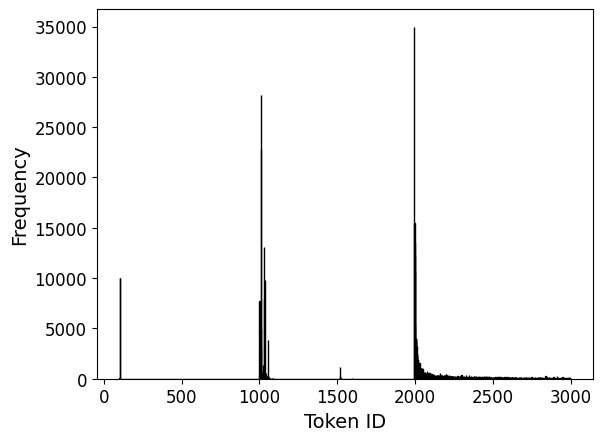

In [ ]:
plt.hist(roberta_trunc_token_id_container, bins=token_id_limit, color='blue', edgecolor='black')
plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.show()

### word embedding layer distribution (100 sentences)

[ 0.16637288 -0.05408396 -0.00136128 ... -0.07321465  0.1384904
 -0.39469904]


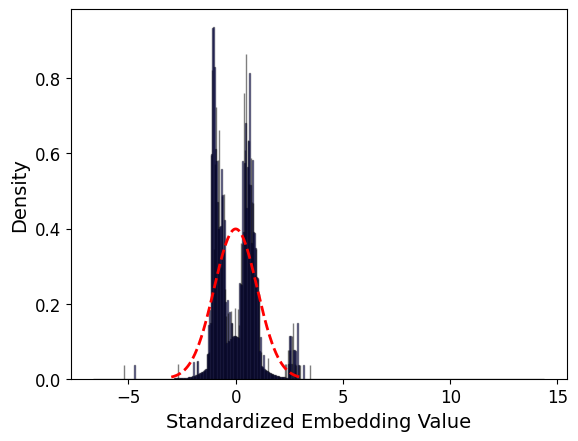

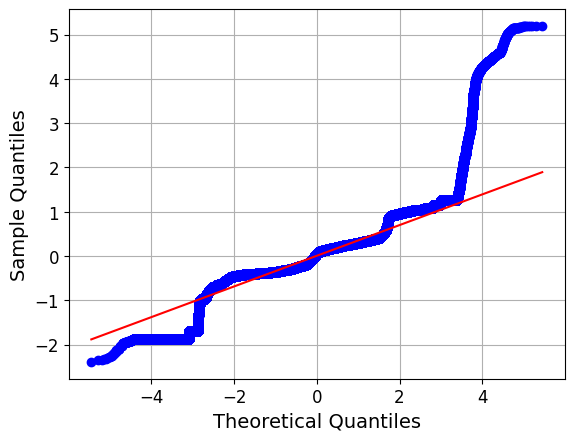

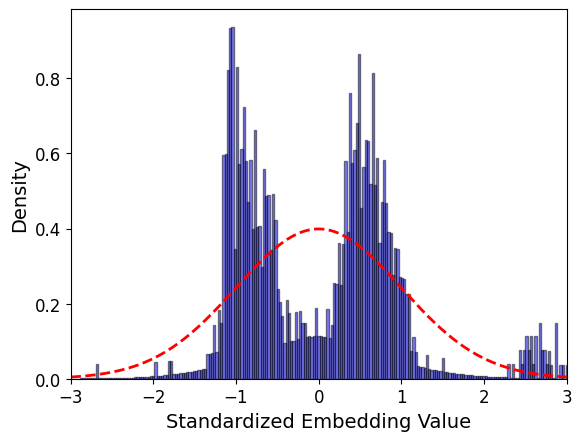

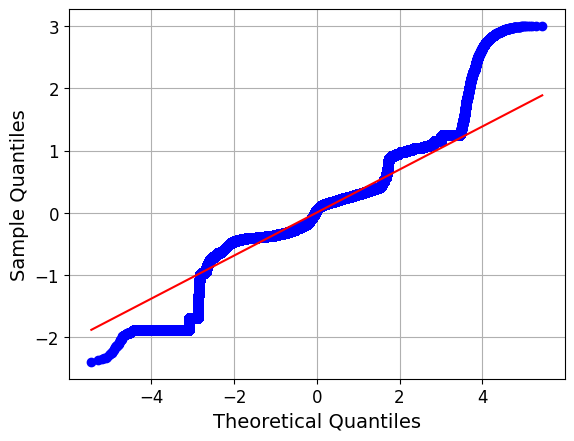

In [ ]:
import scipy.stats as stats
from scipy.stats import norm

#input formating
batch_size = 100
text = dataset['train']['text']
input = text[:batch_size]
input = roberta_tokenizer(input, padding=True, truncation=True, return_tensors="pt")

#Forward pass
with torch.no_grad():
    outputs = roberta_model(**input)
hidden_states = outputs.hidden_states #[layer, batch, token, features]

word_embedding_output = hidden_states[0]

# Flatten the data
data = word_embedding_output.reshape(-1).numpy()
print(data)

# Standardize the data
mean = np.mean(data)
std = np.std(data)
data_standardized = (data - mean) / std

# Plot the normalized histogram of standardized data
plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)

x = np.linspace(-3, 3, 500)
pdf = norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf, 'r--', lw=2)

plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.show()

stats.probplot(data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()

plt.hist(data_standardized, bins=768, color='blue', edgecolor='black', density=True, alpha=0.5)
plt.plot(x, pdf, 'r--', lw=2)
plt.xlabel('Standardized Embedding Value')
plt.ylabel('Density')
plt.xlim(-3, 3)
plt.show()

filtered_data = data[(data >= -3) & (data <= 3)]
stats.probplot(filtered_data, dist="norm", plot=plt)

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title('')
plt.grid(True)
plt.show()